# US Flights Data Exploration for year 2008
## by Abhishek Acharya

## Investigation Overview

> Explore US flights data for year 2008 to find -
     1. Different reason behind the delay
     2. Distributuon of arrival delay
     3. Average Departure delay of different airlines     
     4. Best airport in US in terms of arrival delay
     


## Dataset Overview

> Dataset containing 7009728 records, reports flights in the United States, including
carriers, arrival and departure delays, and reasons for delays in 2008.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
flights = pd.read_csv('2008.csv')
pd.options.display.max_columns = 50


In [3]:
# Fix the data format because the original format does not have even leading digit (4 digit). Example: 945 instead of 0945.

flights.DepTime = flights.DepTime.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)
flights.CRSDepTime = flights.CRSDepTime.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)
flights.ArrTime = flights.ArrTime.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)
flights.CRSArrTime = flights.CRSArrTime.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)

# convert month int to month name
flights['Month'] = flights['Month'].apply(lambda x: calendar.month_abbr[x])

# convert DayOfWeek int to DayOfWeek name
flights['DayOfWeek'] = flights['DayOfWeek'] -1
flights['DayOfWeek'] = flights['DayOfWeek'].apply(lambda x: calendar.day_abbr[x])

## Create a new column DelayElapsedTime from ActualElapsedTime and CRSElapsedTime
flights["DelayElapsedTime"] = flights.ActualElapsedTime - flights.CRSElapsedTime

# "ArrDelay = DepDelay + DelayElapsedTime"  or "ArrDelay - DepDelay - DelayElapsedTime = 0"
flights_df = flights[(flights.ArrDelay-flights.DepDelay-flights.DelayElapsedTime)==0]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## 1. Different reasons behind the flight delay in 2008

> There are different reasons due to which an Aircraft may delay. I found that the primary reason of a flight delay was 'CarrierDelay'. I also noticed that the flights were never delayed due to 'SecurityDelay'.

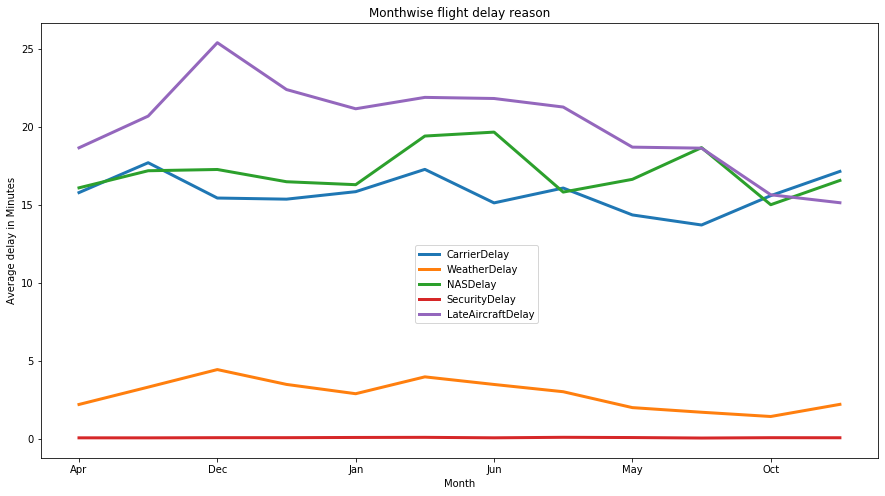

In [8]:
# plotting the data
flight_sub_df = flights_df.groupby('Month').agg({'CarrierDelay':'mean', 'WeatherDelay':'mean','NASDelay':'mean','SecurityDelay':'mean','LateAircraftDelay':'mean'})
flight_sub_df.plot.line(linewidth=3.0,figsize = [15,8])
plt.title('Monthwise flight delay reason')
plt.xlabel('Month')
plt.ylabel('Average delay in Minutes')
plt.legend(bbox_to_anchor=(0.6,0.5));


## 2. Distribution of Arrival delay.

> ArrDelay can be defined by below formula

> `ArrDelay = DepDelay + DelayElapsedTime` 

> Where `DelayElapsedTime = ActualElapsedTime- CRSElapsedTime`

I found that the average arrival delay of a fligt was about -35 to 20 minutes. Minus sign indicates that flight was arrived early than scheduled arrival time. I also noticed that sometimes arrival delay was more than 150 minutes.

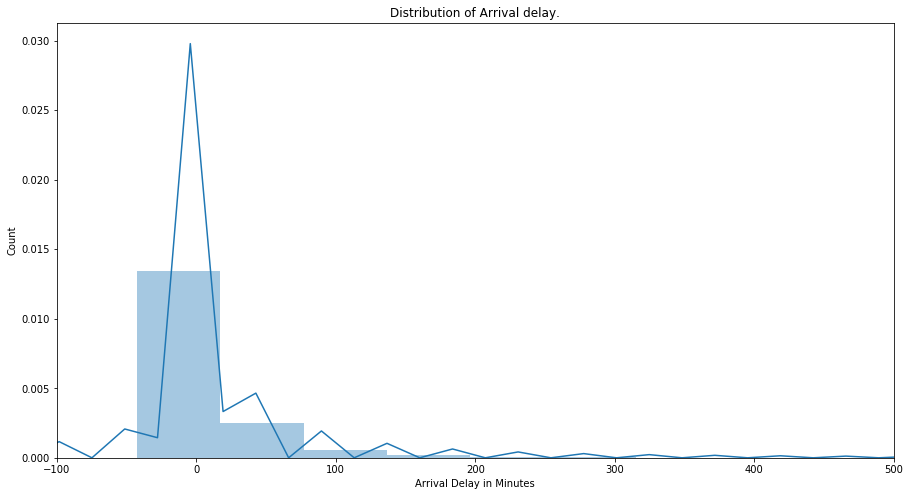

In [14]:
plt.figure(figsize = [15,8])
sb.distplot(flights_df['ArrDelay'])
plt.xlim(-100,500)
plt.title('Distribution of Arrival delay.')
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Count');

## 3. Average Departure Delay of different Airlines

> DepDelay can be defined by below formula

> `DepDelay = ArrDelay - DelayElapsedTime` 

> Where `DelayElapsedTime = ActualElapsedTime- CRSElapsedTime`

I seleced the unique airlines with atleast 1000 entries in flight data set and observed that in 2008 average departure delay of United Airlies was highest (i.e.about 15 minutes) compare to other airlines. 

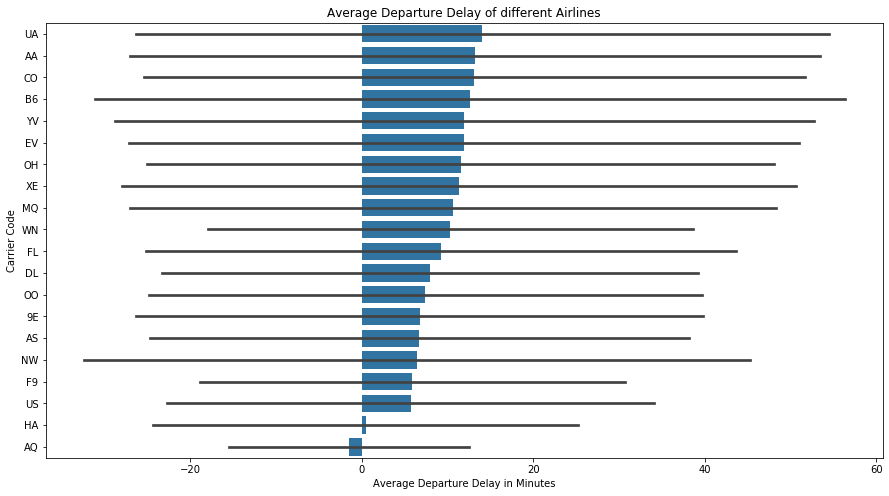

In [12]:
THRESHOLD = 1000
make_frequency = flights_df['UniqueCarrier'].value_counts()
idx = np.sum(make_frequency > THRESHOLD)

most_makes = make_frequency.index[:idx]
flights_df_sub = flights_df.loc[flights_df['UniqueCarrier'].isin(most_makes)]

make_means = flights_df_sub.groupby('UniqueCarrier').mean()
comb_order = make_means.sort_values('DepDelay', ascending = False).index

# plotting

# plotting the data
plt.figure(figsize = [15,8])
base_color = sb.color_palette()[0]
sb.barplot(data = flights_df_sub, x = 'DepDelay', y = 'UniqueCarrier',
           color = base_color, order = comb_order, ci = 'sd')

plt.title('Average Departure Delay of different Airlines')
plt.xlabel('Average Departure Delay in Minutes')
plt.ylabel('Carrier Code');

## 4. Best Airport in US in terms of Arrival delay

> Arrival delay at an airport is a delay due to the late arrival of an aircraft.  There are different reasons behind the delay which were presented in slide 1. 

> I selected the airports with atleast 100000 entires in flight dataset. My finding says that the best airport in US in terms of arrival delay was SLC (i.e. Salt Lake City International Airport). In SLC average arrival delay was lowest (i.e. close to 3 minutes).

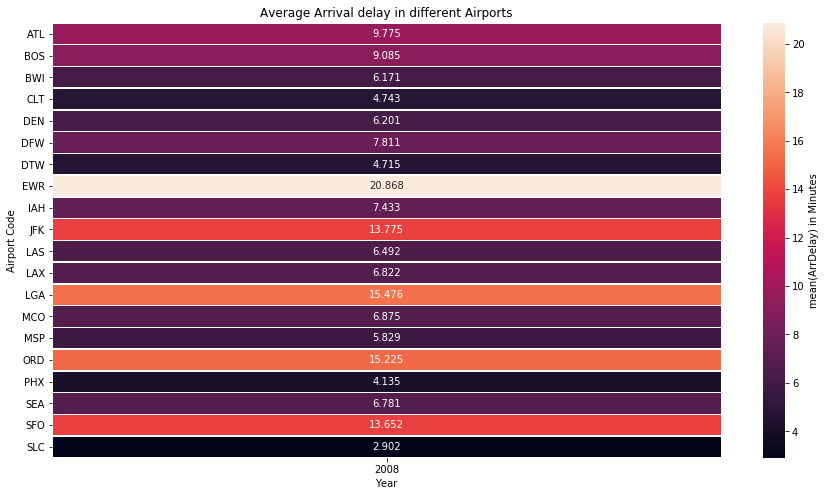

In [13]:
THRESHOLD = 100000
dest_frequency = flights_df['Dest'].value_counts()
idx = np.sum(dest_frequency > THRESHOLD)

most_dest = dest_frequency.index[:idx]
flights_dest_sub_df = flights_df.loc[flights_df['Dest'].isin(most_dest)]

cat_means = flights_dest_sub_df.groupby(['Year', 'Dest']).mean()['ArrDelay']
cat_means = cat_means.reset_index(name = 'num_var2_avg')
cat_means = cat_means.pivot(index = 'Dest', columns = 'Year',values = 'num_var2_avg')
fig, ax = plt.subplots(figsize=(15,8))         # Sample figsize in inches
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(ArrDelay) in Minutes'},linewidths=.5, ax=ax)

plt.title('Average Arrival delay in different Airports')
plt.xlabel('Year')
plt.ylabel('Airport Code');


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!